<a href="https://colab.research.google.com/github/denuradhan/PVCK_GENAP_2021/blob/main/week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [45]:
def convolution2d(image, kernel, padding=0, strides=1):
    kernel = np.flipud(np.fliplr(kernel))

    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
    else:
        imagePadded = image

    for y in range(image.shape[1]):
        if y > image.shape[1] - yKernShape:
            break
        if y % strides == 0:
            for x in range(image.shape[0]):
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break
    return output

In [14]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/mandrill.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [57]:
#image sharpen
kernel = np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]])


In [51]:
#image emboss
kernel = np.array([[-2,-1,0],
                  [-1,1,1],
                  [0,1,2]])

In [53]:
#left sobel edge detection
kernel = np.array([[1,0,-1],
                  [2,0,-2],
                  [1,0,-1]])

In [55]:
#canny edge detection
kernel = np.array([[-1,-1,-1],
                  [-1,8,-1],
                  [-1,-1,-1]])

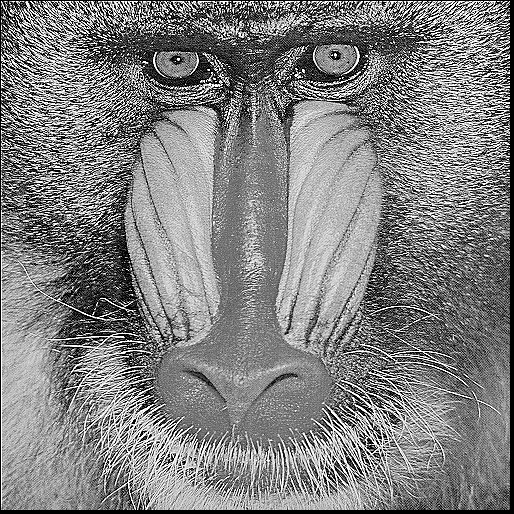

In [58]:
#run cell kernel untuk mengganti efek
output = convolution2d(img_gray, kernel, padding=2)
cv.imwrite('/content/drive/MyDrive/PCVK/Images/2DConvolved.jpg', output)
sharpen = cv.imread('/content/drive/MyDrive/PCVK/Images/2DConvolved.jpg')
cv2_imshow(sharpen)